In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

plt.rcParams['legend.title_fontsize'] = 'large'

import altair as alt
from altair import datum


In [42]:
first_vax_cal_df = pd.read_excel("../data/mpox2024_vax_calibration.xlsx", sheet_name = "1st dose total", parse_dates = ["Date"])
first_vax_plwh_cal_df = pd.read_excel("../data/mpox2024_vax_calibration.xlsx", sheet_name = "1st dose PWH", parse_dates = ["Date"])
second_vax_cal_df = pd.read_excel("../data/mpox2024_vax_calibration.xlsx", sheet_name = "2nd dose total", parse_dates = ["Date"])


In [52]:
first_vax_plwh_cal_df.Empirical[first_vax_plwh_cal_df.Empirical == "<5"] = 2.5
first_vax_plwh_cal_df.Empirical = first_vax_plwh_cal_df.Empirical.astype("float")

/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_1162/2234589889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_vax_plwh_cal_df.Empirical[first_vax_plwh_cal_df.Empirical == "<5"] = 2.5


/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_1162/4172098630.py:171: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


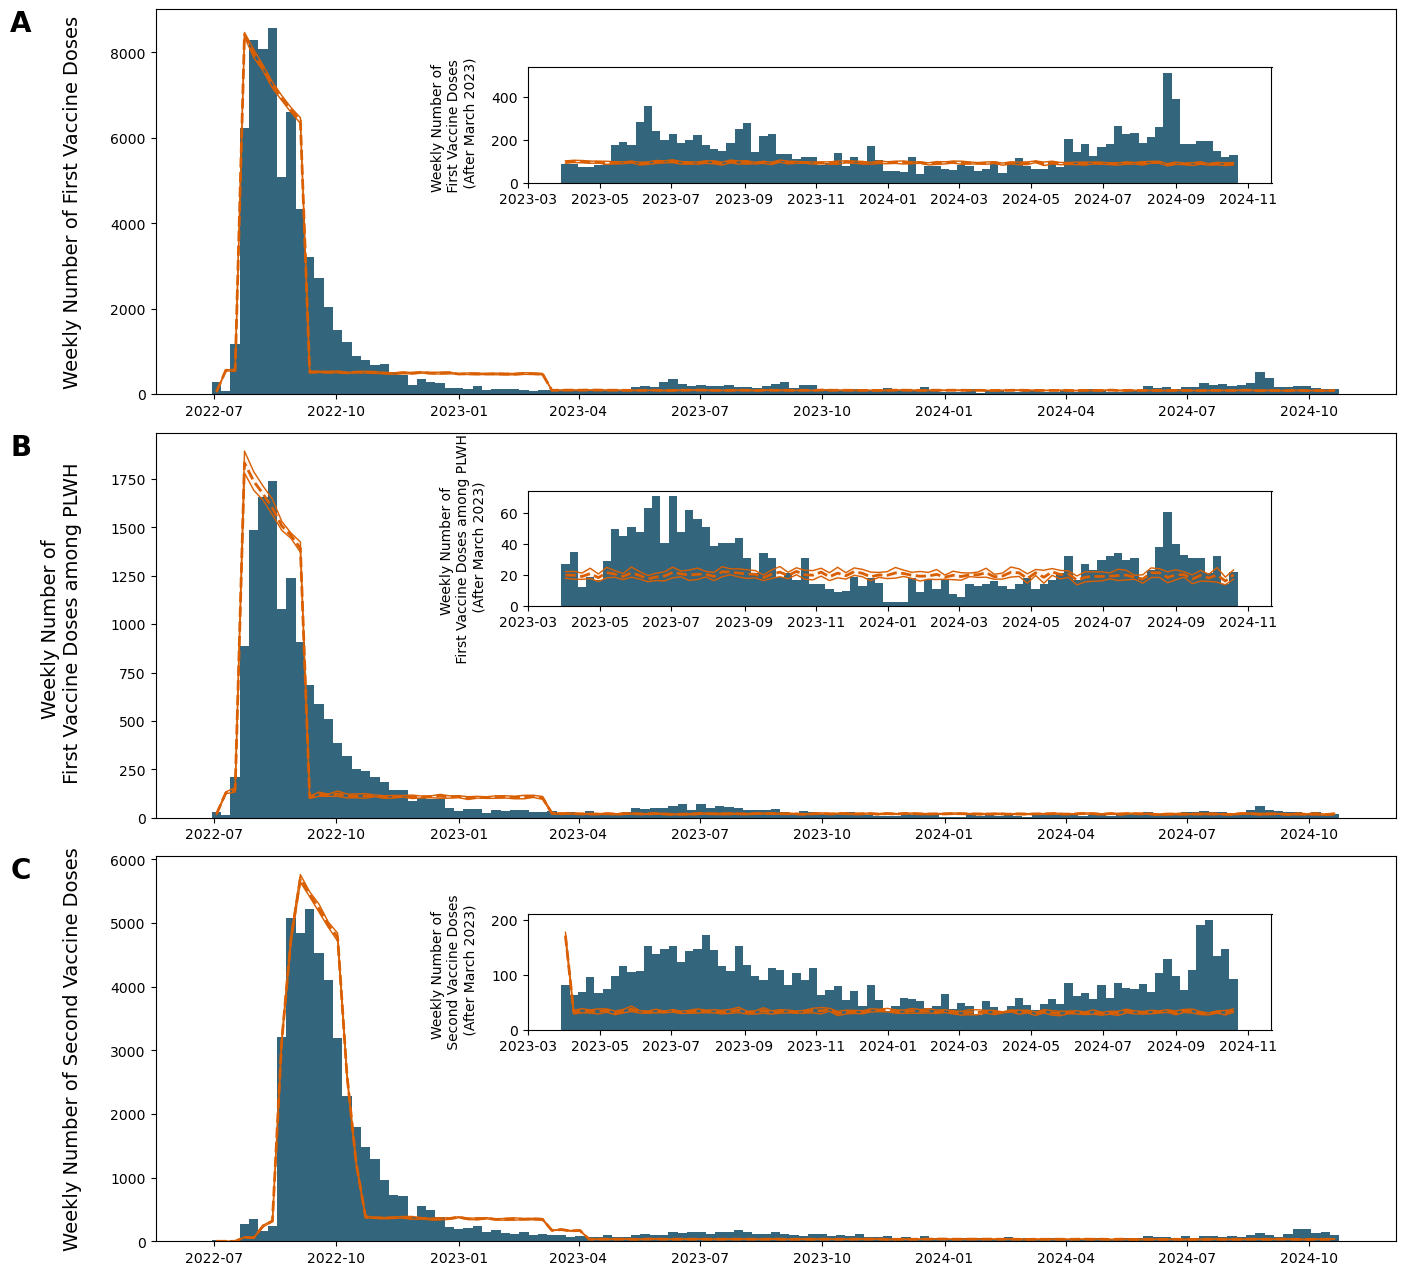

In [63]:
fig = plt.figure(figsize=(16,16),facecolor='w')


gs = GridSpec(3, 3, height_ratios=[1, 1,1], width_ratios=[1, 1,1], hspace=0.1)  



# Add the first subplot (main plot with all the identified introductions)
ax1 = fig.add_subplot(gs[0, :])

ins_ax = ax1.inset_axes([.3, .55, .6, .3])  # [x, y, width, height] w.r.t. ax

# set blank white face for background    
ax1.set_facecolor('white')

first_vax_cal_df.Date = pd.to_datetime(first_vax_cal_df.Date)


sims = "#d95f02"
empirical = "#003f5c"

# remove grid 
ax1.grid(False)

##plot empirical vax cases

ax1.bar(first_vax_cal_df.Date, first_vax_cal_df["Empirical"], color=empirical, alpha = 0.8, width = 7)


#first plot the mean
ax1.plot(first_vax_cal_df.Date,first_vax_cal_df["Model"],color=sims,ls='--',lw=2)


# then the bounds
ax1.fill_between(first_vax_cal_df.Date,first_vax_cal_df.lb,first_vax_cal_df.ub,alpha=0.05,facecolor=sims,edgecolor=sims,zorder=1000)
ax1.plot(first_vax_cal_df.Date,first_vax_cal_df.lb,color=sims,lw=1,zorder=1000)
ax1.plot(first_vax_cal_df.Date,first_vax_cal_df.ub,color=sims,lw=1,zorder=1000)
#ax1.set_ylim(0,30)
ax1.set_ylabel('Weekly Number of First Vaccine Doses', fontsize=14, rotation = 90, labelpad=20)

## now the inset graph with the smaller time frame


ins_ax.bar(first_vax_cal_df[first_vax_cal_df.Date > "2023-04-01"].Date, first_vax_cal_df[first_vax_cal_df.Date > "2023-04-01"]["Empirical"], color=empirical, alpha = 0.8, width = 7)


#first plot the mean
ins_ax.plot(first_vax_cal_df[first_vax_cal_df.Date > "2023-04-01"].Date,first_vax_cal_df[first_vax_cal_df.Date > "2023-04-01"]["Model"],color=sims,ls='--',lw=2)


# then the bounds
ins_ax.fill_between(first_vax_cal_df[first_vax_cal_df.Date > "2023-04-01"].Date,first_vax_cal_df[first_vax_cal_df.Date > "2023-04-01"].lb,first_vax_cal_df[first_vax_cal_df.Date > "2023-04-01"].ub,alpha=0.05,facecolor=sims,edgecolor=sims,zorder=1000)
ins_ax.plot(first_vax_cal_df[first_vax_cal_df.Date > "2023-04-01"].Date,first_vax_cal_df[first_vax_cal_df.Date > "2023-04-01"].lb,color=sims,lw=1,zorder=1000)
ins_ax.plot(first_vax_cal_df[first_vax_cal_df.Date > "2023-04-01"].Date,first_vax_cal_df[first_vax_cal_df.Date > "2023-04-01"].ub,color=sims,lw=1,zorder=1000)
#ax1.set_ylim(0,30)
ins_ax.set_ylabel('Weekly Number of \n First Vaccine Doses \n (After March 2023)', fontsize=10, rotation = 90, labelpad=10)



####
####
####
ax2 = fig.add_subplot(gs[1, :])

ins_ax2 = ax2.inset_axes([.3, .55, .6, .3])  # [x, y, width, height] w.r.t. ax

# set blank white face for background    
ax2.set_facecolor('white')

first_vax_plwh_cal_df.Date = pd.to_datetime(first_vax_plwh_cal_df.Date)


sims = "#d95f02"
empirical = "#003f5c"

# remove grid 
ax2.grid(False)

##plot empirical vax cases

ax2.bar(first_vax_plwh_cal_df.Date, first_vax_plwh_cal_df["Empirical"], color=empirical, alpha = 0.8, width = 7)


#first plot the mean
ax2.plot(first_vax_plwh_cal_df.Date,first_vax_plwh_cal_df["Model"],color=sims,ls='--',lw=2)


# then the bounds
ax2.fill_between(first_vax_plwh_cal_df.Date,first_vax_plwh_cal_df.lb,first_vax_plwh_cal_df.ub,alpha=0.05,facecolor=sims,edgecolor=sims,zorder=1000)
ax2.plot(first_vax_plwh_cal_df.Date,first_vax_plwh_cal_df.lb,color=sims,lw=1,zorder=1000)
ax2.plot(first_vax_plwh_cal_df.Date,first_vax_plwh_cal_df.ub,color=sims,lw=1,zorder=1000)
#ax1.set_ylim(0,30)
ax2.set_ylabel('Weekly Number of \n First Vaccine Doses among PLWH', fontsize=14, rotation = 90, labelpad=20)


## now the inset graph with the smaller time frame

ins_ax2.bar(first_vax_plwh_cal_df[first_vax_plwh_cal_df.Date > "2023-04-01"].Date, first_vax_plwh_cal_df[first_vax_plwh_cal_df.Date > "2023-04-01"]["Empirical"], color=empirical, alpha = 0.8, width = 7)


#first plot the mean
ins_ax2.plot(first_vax_plwh_cal_df[first_vax_plwh_cal_df.Date > "2023-04-01"].Date,first_vax_plwh_cal_df[first_vax_plwh_cal_df.Date > "2023-04-01"]["Model"],color=sims,ls='--',lw=2)


# then the bounds
ins_ax2.fill_between(first_vax_plwh_cal_df[first_vax_plwh_cal_df.Date > "2023-04-01"].Date,first_vax_plwh_cal_df[first_vax_plwh_cal_df.Date > "2023-04-01"].lb,first_vax_plwh_cal_df[first_vax_plwh_cal_df.Date > "2023-04-01"].ub,alpha=0.05,facecolor=sims,edgecolor=sims,zorder=1000)
ins_ax2.plot(first_vax_plwh_cal_df[first_vax_plwh_cal_df.Date > "2023-04-01"].Date,first_vax_plwh_cal_df[first_vax_plwh_cal_df.Date > "2023-04-01"].lb,color=sims,lw=1,zorder=1000)
ins_ax2.plot(first_vax_plwh_cal_df[first_vax_plwh_cal_df.Date > "2023-04-01"].Date,first_vax_plwh_cal_df[first_vax_plwh_cal_df.Date > "2023-04-01"].ub,color=sims,lw=1,zorder=1000)
#ax1.set_ylim(0,30)
ins_ax2.set_ylabel('Weekly Number of \n First Vaccine Doses among PLWH \n (After March 2023)', fontsize=10, rotation = 90, labelpad=10)


#####
#####

ax3 = fig.add_subplot(gs[2, :])

ins_ax3 = ax3.inset_axes([.3, .55, .6, .3])  # [x, y, width, height] w.r.t. ax

# set blank white face for background    
ax3.set_facecolor('white')

second_vax_cal_df.Date = pd.to_datetime(second_vax_cal_df.Date)


sims = "#d95f02"
empirical = "#003f5c"

# remove grid 
ax3.grid(False)

##plot empirical vax cases

ax3.bar(second_vax_cal_df.Date, second_vax_cal_df["Empirical"], color=empirical, alpha = 0.8, width = 7)


#first plot the mean
ax3.plot(second_vax_cal_df.Date,second_vax_cal_df["Model"],color=sims,ls='--',lw=2)


# then the bounds
ax3.fill_between(second_vax_cal_df.Date,second_vax_cal_df.lb,second_vax_cal_df.ub,alpha=0.05,facecolor=sims,edgecolor=sims,zorder=1000)
ax3.plot(second_vax_cal_df.Date,second_vax_cal_df.lb,color=sims,lw=1,zorder=1000)
ax3.plot(second_vax_cal_df.Date,second_vax_cal_df.ub,color=sims,lw=1,zorder=1000)
#ax1.set_ylim(0,30)
ax3.set_ylabel('Weekly Number of Second Vaccine Doses', fontsize=14, rotation = 90, labelpad=20)


## now the inset graph with the smaller time frame

ins_ax3.bar(second_vax_cal_df[second_vax_cal_df.Date > "2023-04-01"].Date, second_vax_cal_df[second_vax_cal_df.Date > "2023-04-01"]["Empirical"], color=empirical, alpha = 0.8, width = 7)


#first plot the mean
ins_ax3.plot(second_vax_cal_df[second_vax_cal_df.Date > "2023-04-01"].Date,second_vax_cal_df[second_vax_cal_df.Date > "2023-04-01"]["Model"],color=sims,ls='--',lw=2)


# then the bounds
ins_ax3.fill_between(second_vax_cal_df[second_vax_cal_df.Date > "2023-04-01"].Date,second_vax_cal_df[second_vax_cal_df.Date > "2023-04-01"].lb,second_vax_cal_df[second_vax_cal_df.Date > "2023-04-01"].ub,alpha=0.05,facecolor=sims,edgecolor=sims,zorder=1000)
ins_ax3.plot(second_vax_cal_df[second_vax_cal_df.Date > "2023-04-01"].Date,second_vax_cal_df[second_vax_cal_df.Date > "2023-04-01"].lb,color=sims,lw=1,zorder=1000)
ins_ax3.plot(second_vax_cal_df[second_vax_cal_df.Date > "2023-04-01"].Date,second_vax_cal_df[second_vax_cal_df.Date > "2023-04-01"].ub,color=sims,lw=1,zorder=1000)
#ax1.set_ylim(0,30)
ins_ax3.set_ylabel('Weekly Number of \n Second Vaccine Doses \n (After March 2023)', fontsize=10, rotation = 90, labelpad=10)

## add in letters for pub
ax1.text(-0.1, 1, "A", transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax2.text(-0.1, 1, "B", transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax3.text(-0.1, 1, "C", transform=ax3.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  

# Show the plot
plt.tight_layout()
plt.savefig('../figures/microsim_vax_validation.png',dpi=300,bbox_inches='tight')
plt.show()